In [18]:
import numpy as np
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import matplotlib as m
import matplotlib.colors 


mypath_L20                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4E/L_20/"
mypath_L40                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4E/High_Resolution_Files/L_40/"
mypath_L60                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4E/L_60/"
mypath_L80                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4E/High_Resolution_Files/L_80/"
mypath_L100                 = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4E/High_Resolution_Files/L_100/"

def read_files(path):  
    
    # N, E, M in struct [Type, Value, File]
    T_r = 348 #34
    number_of_files = 2
    T = np.zeros((T_r, number_of_files))
    E = np.zeros((T_r, number_of_files))
    E2 = np.zeros((T_r, number_of_files))
    M  = np.zeros((T_r, number_of_files))
    M2 = np.zeros((T_r, number_of_files))
    Abs_M = np.zeros((T_r, number_of_files))
    Chi =  np.zeros((T_r, number_of_files))
    CV =  np.zeros((T_r, number_of_files))
    
    file_counter = 0
    for filename in os.listdir(path):
        with open(path + filename, 'r') as infile:
            lines = infile.readlines()[3:]
            line_counter = 0
            for line in lines:
                line = line.split()
                T[line_counter, file_counter] = (float(line[0]))
                E[line_counter, file_counter] = (float(line[1]))
                E2[line_counter, file_counter] = (float(line[2]))
                M[line_counter, file_counter] = (float(line[3]))
                M2[line_counter, file_counter] = (float(line[4]))
                Abs_M[line_counter, file_counter] = (float(line[5]))
                Chi[line_counter, file_counter] = (float(line[6]))
                CV[line_counter, file_counter] = (float(line[7]))
                line_counter += 1
        file_counter += 1
    
    # N
    Avg_T = np.mean(T, axis = 1)
    Avg_E = np.mean(E, axis = 1)
    Avg_E2 = np.mean(E, axis = 1)
    Avg_M = np.mean(M, axis = 1)
    Avg_M2 = np.mean(M2, axis = 1)
    Avg_Abs_M = np.mean(Abs_M, axis = 1)
    Avg_Chi = np.mean(Chi, axis = 1)
    Avg_CV = np.mean(CV, axis = 1)
    
    std_T = np.std(T, axis = 1)
    std_E = np.std(E, axis = 1)
    std_E2 = np.std(E, axis = 1)
    std_M = np.std(M, axis = 1)
    std_M2 = np.std(M2, axis = 1)
    std_Abs_M = np.std(Abs_M, axis = 1)
    std_Chi = np.std(Chi, axis = 1)
    std_CV = np.std(CV, axis = 1)
    
    df = pd.DataFrame({"T": Avg_T, "E": Avg_E, "E2": Avg_E2, "M": Avg_M, "M2": Avg_M2, "Abs_M": Avg_Abs_M, "Chi": Avg_Chi, "CV": Avg_CV, "std_E": std_E, "std_E2": std_E2, "std_M": std_M, "std_M2": std_M2, "std_Abs_M": std_Abs_M, "std_Chi": std_Chi, "std_CV": std_CV})
    return df


#L20 = read_files(mypath_L20)
#L40 = read_files(mypath_L40)
#L60 = read_files(mypath_L60)
L80 = read_files(mypath_L80)
#L100 = read_files(mypath_L100)

analytical_values = np.load('analytical_values.npy')

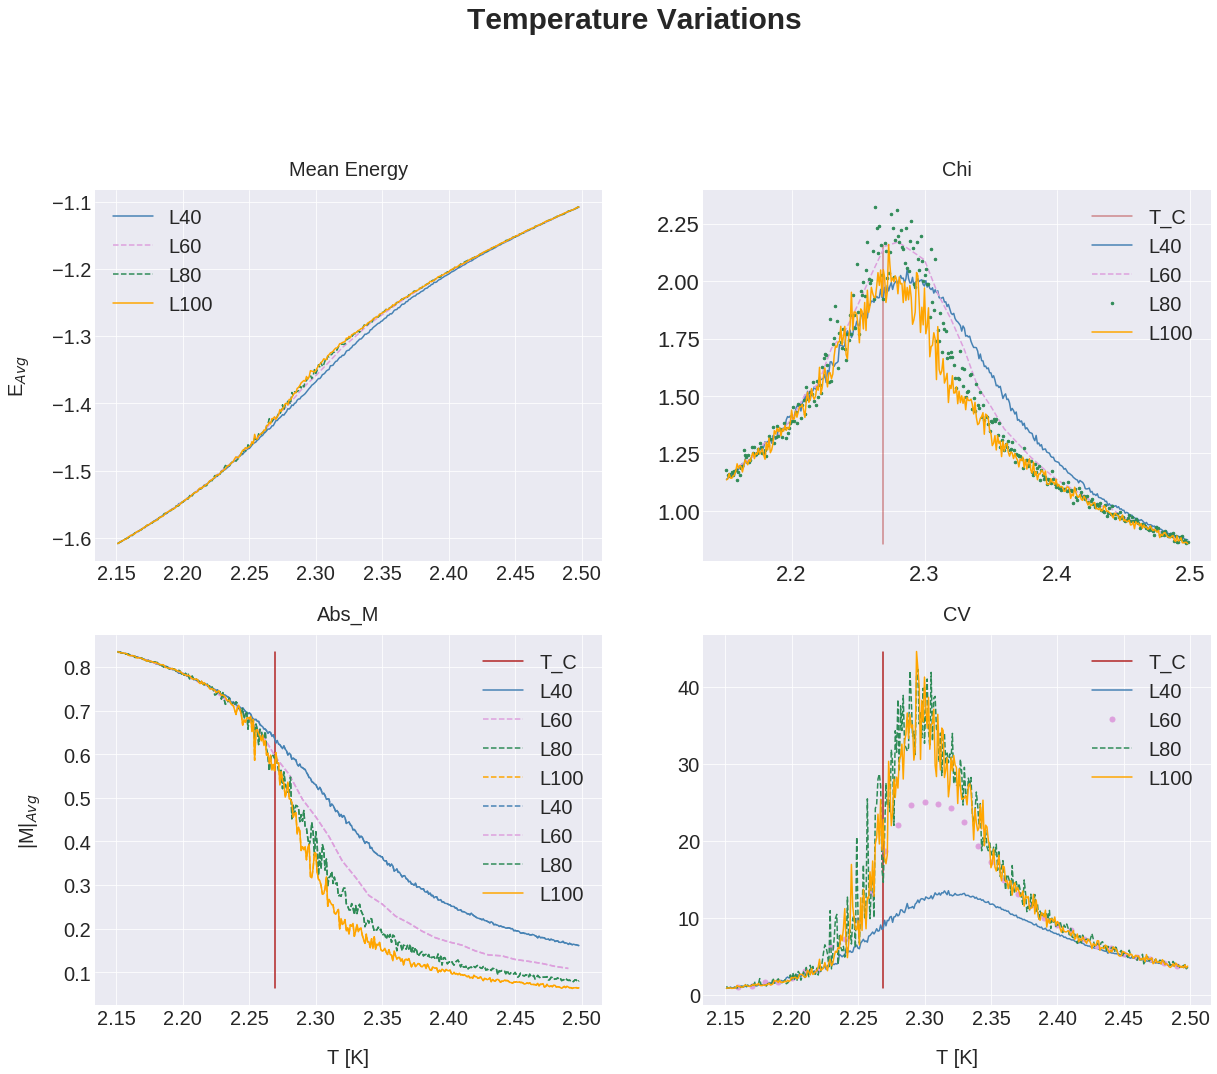

<Figure size 432x288 with 0 Axes>

In [21]:
fsize = 20
fig, axs = plt.subplots(2, 2, figsize = (20,15))
plt.style.use('seaborn-darkgrid')
fig.suptitle('Temperature Variations\n',y=1.05, fontsize=fsize +10, fontweight='bold')

c1 = 'firebrick'
c2 = 'steelblue'
c3 = 'plum'
c4 = 'seagreen'
c5 = 'orange'


axs[0, 0].set_title('Mean Energy', fontsize = fsize, pad = 15)
axs[0, 0].plot(L40['T'], L40['E'], '-', ms = 5 , label = 'L40', c = c2)
#axs[0, 0].plot(L20['T'], L20['E'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[0, 0].plot(L60['T'], L60['E'], '--', ms = 5 , label = 'L60', c = c3)
axs[0, 0].plot(L80['T'], L80['E'], '--', ms = 5 , label = 'L80', c = c4)
axs[0, 0].plot(L100['T'], L100['E'], '-', ms = 5 , label = 'L100', c = c5)



axs[0, 0].legend(fontsize = fsize)

axs[1, 0].set_title('Abs_M', fontsize = fsize, pad = 15)
axs[1, 0].plot([2.269,2.269],[np.min(L100['Abs_M']), np.max(L100['Abs_M'])], ms = 5 , label = 'T_C', c = c1)

axs[1, 0].plot(L40['T'], L40['Abs_M'], '-', ms = 5 , label = 'L40', c = c2)
#axs[1, 0].plot(L20['T'], L20['Abs_M'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[1, 0].plot(L60['T'], L60['Abs_M'], '--', ms = 5 , label = 'L60', c = c3)
axs[1, 0].plot(L80['T'], L80['Abs_M'], '--', ms = 5 , label = 'L80', c = c4)
axs[1, 0].plot(L100['T'], L100['Abs_M'], '--', ms = 5 , label = 'L100', c = c5)

axs[1, 0].plot(L40['T'], L40['Abs_M'], '--', ms = 5 , label = 'L40', c = c2)
#axs[1, 0].plot(L20['T'], L20['Abs_M'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[1, 0].plot(L60['T'], L60['Abs_M'], '--', ms = 5 , label = 'L60', c = c3)
axs[1, 0].plot(L80['T'], L80['Abs_M'], '--', ms = 5 , label = 'L80', c = c4)
axs[1, 0].plot(L100['T'], L100['Abs_M'], '-', ms = 5 , label = 'L100', c = c5)

axs[1, 0].legend(loc = 'best', fontsize = fsize)

axs[0, 1].set_title('Chi', fontsize = fsize, pad = 15)
axs[0, 1].plot([2.269,2.269],[np.min(L100['Chi']), np.max(L100['Chi'])], ms = 5 , label = 'T_C', c = c1, alpha = 0.5)

#axs[0, 1].errorbar(L40['T'], L40['Chi'], L40['std_Chi'], c = c2, alpha = 0.5, linestyle = 'none')

axs[0, 1].plot(L40['T'], L40['Chi'], '-', ms = 5 , label = 'L40', c = c2)
#axs[0, 1].plot(L20['T'], L20['Chi'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[0, 1].plot(L60['T'], L60['Chi'], '--', ms = 5 , label = 'L60', c = c3)
axs[0, 1].plot(L80['T'], L80['Chi'], '.', ms = 5 , label = 'L80', c = c4)
axs[0, 1].plot(L100['T'], L100['Chi'], '-', ms = 5 , label = 'L100', c = c5)
axs[0, 1].legend(fontsize = fsize)

axs[1, 1].set_title('CV', fontsize = fsize, pad = 15)
axs[1, 1].plot([2.269,2.269],[np.min(L100['CV']), np.max(L100['CV'])], ms = 5 , label = 'T_C', c = c1)
axs[1, 1].plot(L40['T'], L40['CV'], '-', ms = 1 , label = 'L40', c = c2)
#axs[1, 1].plot(L20['T'], L20['CV'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[1, 1].plot(L60['T'], L60['CV'], 'o', ms = 5 , label = 'L60', c = c3)
axs[1, 1].plot(L80['T'], L80['CV'], '--', ms = 5 , label = 'L80', c = c4)
axs[1, 1].plot(L100['T'], L100['CV'], '-', ms = 5 , label = 'L100', c = c5)
axs[1, 1].legend(loc = 'best', fontsize = fsize)


axs[1, 0].set_xlabel('T [K]', fontsize = fsize, labelpad = 20)
axs[1, 1].set_xlabel('T [K]', fontsize = fsize, labelpad = 20)
axs[0, 0].set_ylabel('E$_{Avg}$', fontsize = fsize, labelpad = 20)
axs[1, 0].set_ylabel('|M|$_{Avg}$', fontsize = fsize, labelpad = 20)

axs[0, 0].tick_params(labelsize=fsize)
axs[1, 0].tick_params(labelsize=fsize)
axs[1, 1].tick_params(labelsize=fsize)
axs[0, 1].tick_params(labelsize=22)

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
 #   ax.label_outer()

plt.show()
plt.savefig('Plot4.png', bbox_inches='tight')

In [22]:
print(L40['T'][np.argmax(L40['CV'])])
print(L80['T'][np.argmax(L80['CV'])])
print(L100['T'][np.argmax(L100['CV'])])

2.318
2.295
2.294


/home/oline/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
